In [1]:
# Importamos librerías
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Cargamos los datos
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Limpiamos los datos
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Usamos una función de Pandas para transformar la columna de 'str' a 'datetime'
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Usamos un módulo de Python para transformar la columna de 'str' a 'list'

In [2]:
# Creamos un df que sólo contenga los trabajos remotos y excluyendo salarios nulos
df_homeoffice = df[df['job_work_from_home'] == True].dropna(subset='salary_year_avg')

In [3]:
# Filtramos el df para obtener los mejores 6 trabajos
job_titles = df_homeoffice['job_title_short'].value_counts().index[:6].tolist()
df_homeoffice_top6 = df_homeoffice[df_homeoffice['job_title_short'].isin(job_titles)]

# Ordenamos los trabajos por la mediana del salario
job_order = df_homeoffice_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

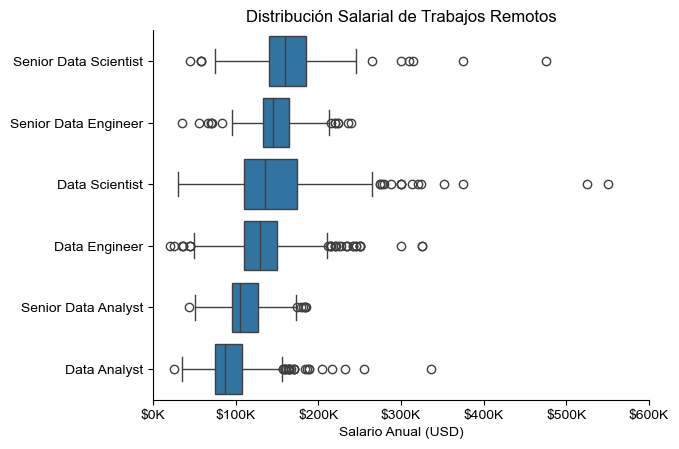

In [4]:
# Realizamos la visualización de la distribución salarial
sns.boxplot(data=df_homeoffice_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Distribución Salarial de Trabajos Remotos')
plt.xlabel('Salario Anual (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [5]:
# Filtramos trabajos de analistas de datos y de manera remota
df_homeoffice = df[(df['job_title_short'] == 'Data Analyst') & df['job_work_from_home'] == True].copy()

# Excluimos los salarios nulos para una visualización coherente
df_homeoffice = df_homeoffice.dropna(subset=['salary_year_avg'])

df_homeoffice = df_homeoffice.explode('job_skills')

df_homeoffice[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
4709,77500.0,python


In [6]:
# Agrupamos los datos para obtener las 10 skills mejores pagas
df_DA_top_pay = df_homeoffice.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pyspark,2,208172.25
bitbucket,2,189154.50
gitlab,3,186000.00
watson,1,160515.00
couchbase,1,160515.00
datarobot,1,155485.50
swift,2,153750.00
golang,1,145000.00
elasticsearch,1,145000.00


In [7]:
# Agrupamos los datos para obtener las 10 skills más requeridas
df_DA_skills = df_homeoffice.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,236,95000.0
power bi,111,95000.0
looker,50,95000.0
sas,124,94000.0
tableau,234,92500.0
sql,402,90000.0
r,147,90000.0
powerpoint,58,85000.0
word,48,83500.0


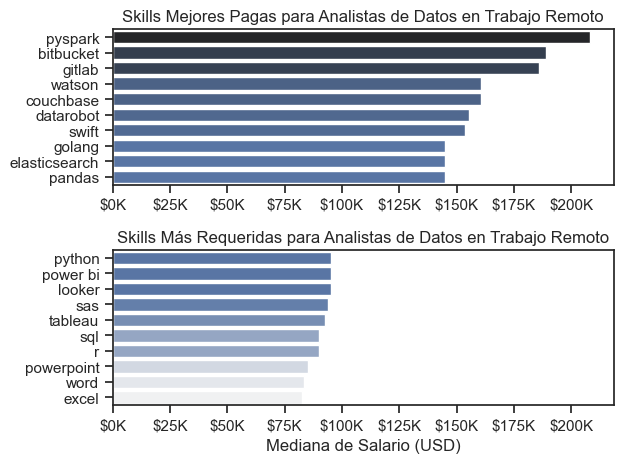

In [8]:
fig, ax = plt.subplots(2, 1)

# Top 10 skills mejores pagas
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Skills Mejores Pagas para Analistas de Datos en Trabajo Remoto')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 skills más requeridas
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Skills Más Requeridas para Analistas de Datos en Trabajo Remoto')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mediana de Salario (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()